In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
import tensorflow as tf


#Load Data

In [ ]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


Show Shape

In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
class_labels

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

#show image

Ankle boot


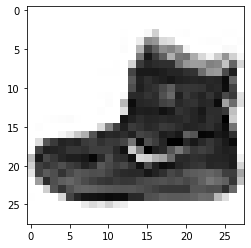

In [ ]:
plt.imshow(x_train[0],cmap="Greys")
print(class_labels[y_train[0]])

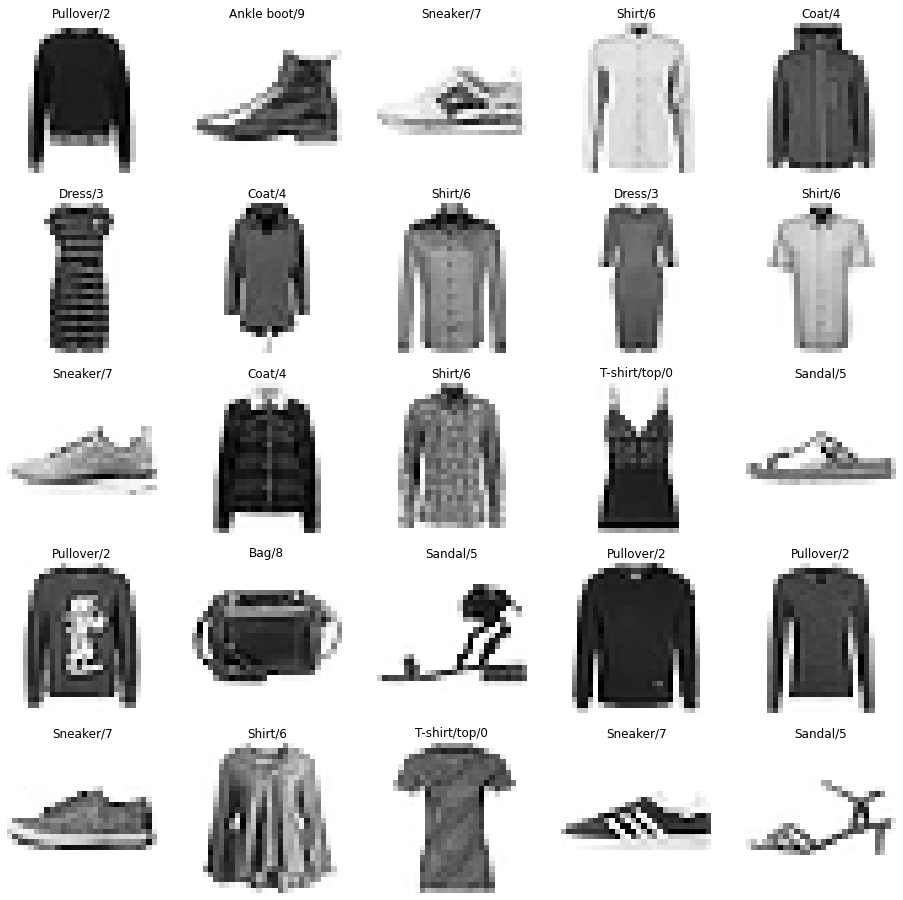

In [ ]:
plt.figure(figsize=(16,16))
j=1

for i in np.random.randint(0,1000,25):
  plt.subplot(5,5,j); j+=1
  plt.imshow(x_train[i],cmap="Greys")
  plt.axis('off')
  plt.title('{}/{}'.format(class_labels[y_train[i]],y_train[i]))

In [ ]:
x_train.ndim

3

In [ ]:
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)

In [ ]:
x_train.ndim

4

Normalization

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

Split Dataset

In [ ]:
from sklearn.model_selection import  train_test_split

In [ ]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train,test_size=0.2,random_state=2020)

In [ ]:

x_train.shape,y_train.shape

((48000, 28, 28, 1), (48000,))

In [ ]:
x_val.shape,y_val.shape

((12000, 28, 28, 1), (12000,))

#CNN model buliding

In [ ]:
model = keras.models.Sequential([
                         keras.layers.Conv2D(filters=32,kernel_size=3,strides=(1,1),padding='valid',activation='relu',input_shape=[28,28,1]),
                         keras.layers.MaxPooling2D(pool_size=(2,2)),
                         keras.layers.Flatten(),
                         keras.layers.Dense(units=128,activation='relu'),
                         keras.layers.Dense(units=10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(x_train,y_train,epochs=10,batch_size=512,verbose=1,validation_data=(x_val,y_val))

Epoch 1/10
94/94 [==============================] - 32s 19ms/step - loss: 0.6186 - accuracy: 0.7903 - val_loss: 0.4482 - val_accuracy: 0.8358
Epoch 2/10
94/94 [==============================] - 1s 15ms/step - loss: 0.3687 - accuracy: 0.8716 - val_loss: 0.3605 - val_accuracy: 0.8725
Epoch 3/10
94/94 [==============================] - 1s 14ms/step - loss: 0.3206 - accuracy: 0.8873 - val_loss: 0.3375 - val_accuracy: 0.8823
Epoch 4/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2930 - accuracy: 0.8961 - val_loss: 0.3008 - val_accuracy: 0.8963
Epoch 5/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2678 - accuracy: 0.9050 - val_loss: 0.2872 - val_accuracy: 0.9022
Epoch 6/10
94/94 [==============================] - 1s 16ms/step - loss: 0.2499 - accuracy: 0.9115 - val_loss: 0.2944 - val_accuracy: 0.8978
Epoch 7/10
94/94 [==============================] - 1s 14ms/step - loss: 0.2374 - accuracy: 0.9146 - val_loss: 0.2730 - val_accuracy: 0.9055
Epoch 8/10
9